# OASIS INFOBYTE TASK 5

# JANUARY 23 BATCH


# SALES PREDICTION

# Built a model that could help predict sales due to the advertisement method used
#MODEL PREPARED BY UBIOMO ENAJITE JUDITH; #EMAIL: judithubiomo@gmail.com; #CONTACT INFO: 08066828305

In [1]:
#import the neccessary libraries to work with
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
#call in the dataset and visualize it
sales_df = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\DATA LIBRARY\Machine learning\Sales_prediction.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# perfoming data wrangling

In [3]:
#this helps to note the number of rows and column
sales_df.shape

(200, 4)

there are 4 columns and 200 rows

In [4]:
sales_df.columns.values.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning and Pre-processing

In [7]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The df has no missing value

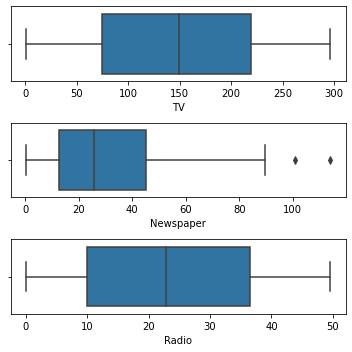

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales_df['TV'], ax = axs[0])
plt2 = sns.boxplot(sales_df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales_df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

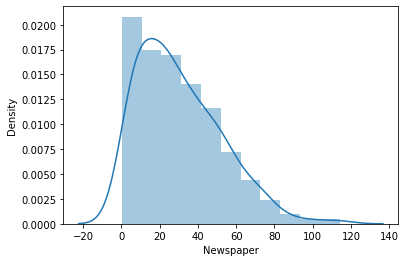

In [9]:
sns.distplot(sales_df['Newspaper'])

In [10]:
iqr = sales_df.Newspaper.quantile(0.75)- sales_df.Newspaper.quantile(0.25)
iqr

32.35

In [11]:
lower_bridge = sales_df['Newspaper'].quantile(0.25)-(iqr*1.5)
higher_bridge = sales_df['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(higher_bridge)

-35.775000000000006
93.625


In [12]:
data = sales_df.copy()

In [13]:
data.loc[data['Newspaper']>93, 'Newspaper']=93

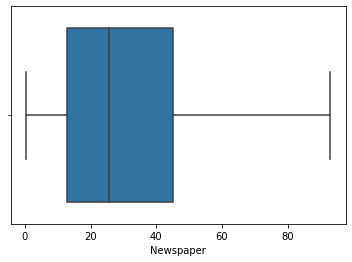

In [14]:
sns.boxplot(data['Newspaper']);

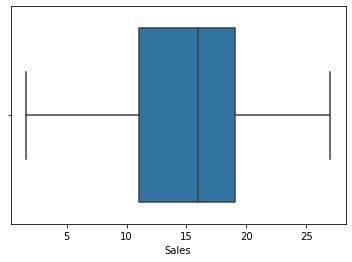

In [15]:
sns.boxplot(data['Sales']);

From the above lines of code, I was able to detect some outliers and also fixed them. 
This helps me as they can negatively affect the statistical analysis and the training process 
of the machine learning algorithm and lowering accuracy

#let's analyse the relationship between sales and other variables using pair plot

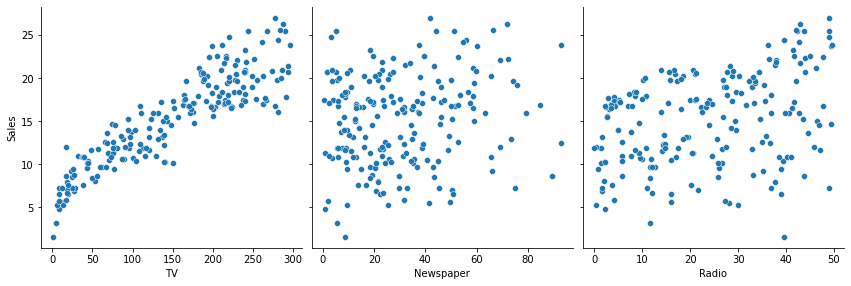

In [16]:
sns.pairplot(data, x_vars = ['TV', 'Newspaper', 'Radio'],
            y_vars = 'Sales', height=4, aspect = 1, kind = 'scatter')
plt.show()

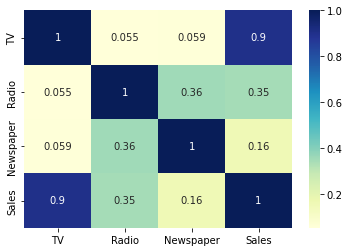

In [17]:
sns.heatmap(data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

Tv gave the best correlation with sales(0.9), compared to Radio(0.35),
and newspaper(0.16)


# feature engineering and model building

In [18]:
x = data['TV']
y = data['Sales']

In [19]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [20]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# TRAIN-TEST SPLIT

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, train_size= 0.8, test_size= 0.2, random_state=100)

In [22]:
x_train

168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 160, dtype: float64

In [23]:
y_train

168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 160, dtype: float64

In [24]:
import statsmodels.api as sm

In [25]:
#adding constant for intercept
x_train_constant = sm.add_constant(x_train)

In [26]:
model = sm.OLS(y_train, x_train_constant).fit()

In [27]:
model.params

const    6.995533
TV       0.054105
dtype: float64

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           5.03e-61
Time:                        04:44:52   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

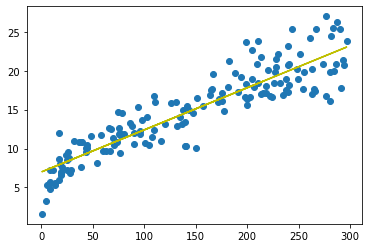

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.995533 + 0.054105*x_train, 'y')
plt.show()

In [30]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

168   -1.549854
112    0.598134
171    1.604115
181   -1.617581
7     -0.299012
         ...   
87     3.014990
103    2.538047
67    -1.132427
24    -0.666304
8     -2.660840
Length: 160, dtype: float64

In [31]:
y_train_pred

168    18.649854
112    16.501866
171    15.895885
181    18.817581
7      13.499012
         ...    
87     12.985010
103    17.161953
67     14.532427
24     10.366304
8       7.460840
Length: 160, dtype: float64

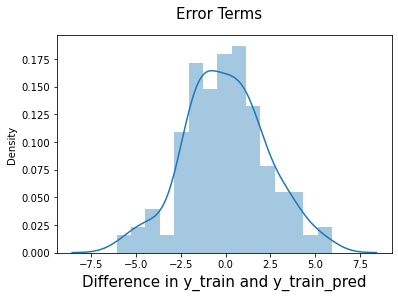

In [32]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

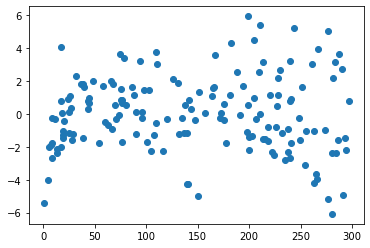

In [33]:
#Residual pattern
plt.scatter(x_train,res)
plt.show

In [34]:
#Add a constant to x_test
x_test_constant = sm.add_constant(x_test)

#predict the y values corresponding to x_test_sm
y_pred = model.predict(x_test_constant)

In [35]:
y_pred.head()

126     7.417556
104    19.883459
99     14.310594
92     18.774296
111    20.072828
dtype: float64

Let's examine the RMSE(root mean squared_error)

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.3126831803046133

In [38]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7281352744078877

visualize fit on test set

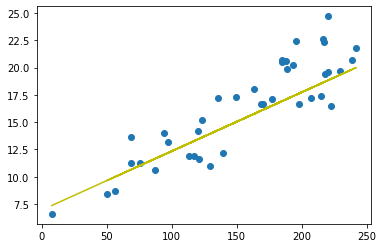

In [39]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'y')
plt.show()

In [40]:
import pickle


In [41]:
with open('my pickle.pickle','wb') as f:
    pickle.dump(model, f)

In [42]:
with open('my pickle.pickle','rb') as f:
    slr_model = pickle.load(f)
print(slr_model)
    